In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

Transformação dos dados para torch.FloatTensor e normalização dos valores (*)

Se um pixel tem valor 0, ao dividir por 255, ainda será 0.

Se um pixel tem valor 255, ao dividir por 255, vira 1.

Um pixel que vale 128, por exemplo, ao dividir por 255, vira 0,5.

In [2]:
transform = transforms.ToTensor()

Carregamento dos Datasets de treino e teste:

In [3]:
train_data = datasets.MNIST(root      = 'data',
                            train     = True,
                            download  = True,
                            transform = transform)

test_data = datasets.MNIST(root      = 'data',
                           train     = False,
                           download  = True,
                           transform = transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 649kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.53MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.45MB/s]


Configuração dos data loaders

In [4]:
num_workers = 0

batch_size = 20

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

Obtendo uma amostra do batch de imagens de treino

In [10]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

Convertendo para Numpy e Selecionando uma Imagem:

In [11]:
images = images.numpy()
img = np.squeeze(images[2])

Exibindo a Imagem com os Valores dos Pixels:

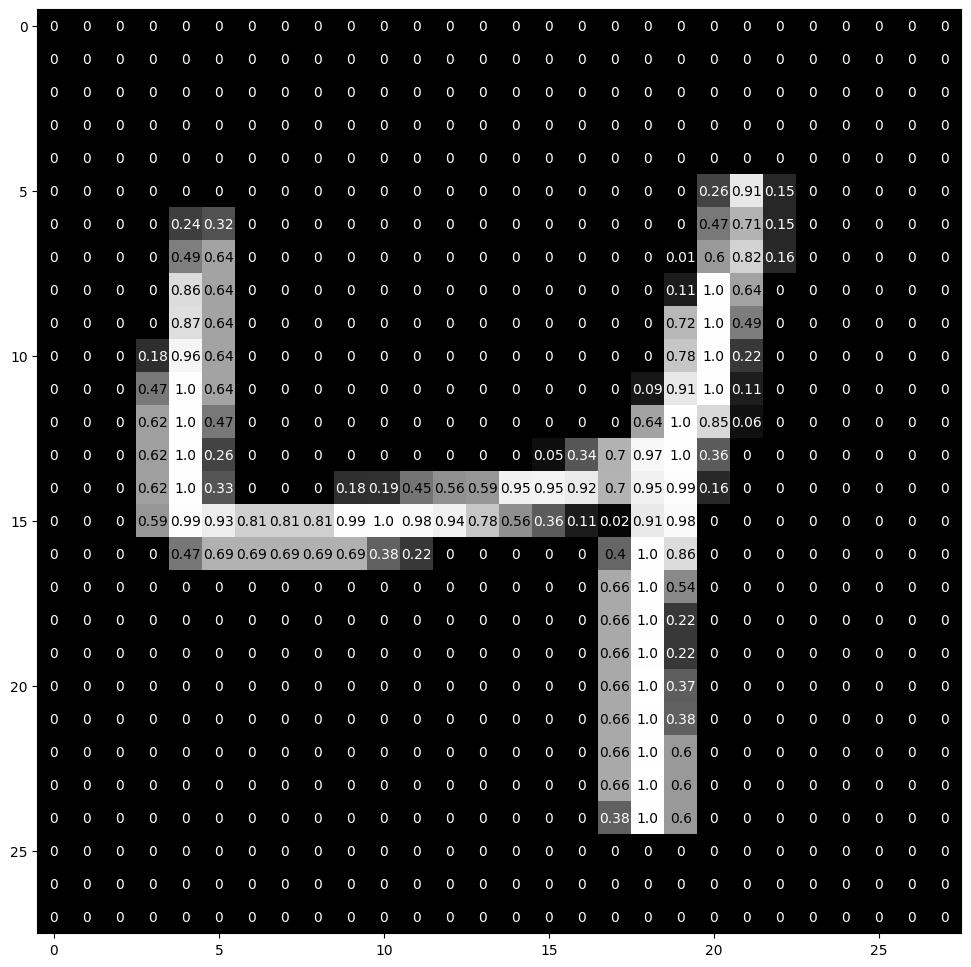

In [12]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max() / 2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y], 2) if img[x][y] != 0 else 0
        ax.annotate(str(val), xy=(y, x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y] < thresh else 'black')